In [5]:
import numpy as np
import pandas as pd
np.random.seed(50)
instances = 10000
n_features = 6
classes = 3
features = np.random.normal(loc=0, scale=1, size=(instances,n_features))
features[:, 0] = features[:, 0] * features[:, 1]
features[:, 2] = features[:, 2] + features[:, 3]
features[:, 4] = features[:, 4] - features[:, 5]
target_labels = np.random.randint(0, classes, instances)
classi= pd.DataFrame(features, columns=[f"Feature_{i+1}" for i in range(n_features)])
classi['Target_Label'] = target_labels
classi.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Target_Label
0,0.048336,-0.030978,-2.085509,-1.464580,1.888678,-0.476732,1
1,-0.835311,1.070268,-2.609771,-1.327479,-0.735856,0.862194,2
2,-0.233104,-0.334565,0.601382,1.598908,2.326305,0.987770,1
3,0.092006,0.742785,-0.245840,0.148116,-0.251519,-0.160715,0
4,0.039832,0.285469,1.429645,1.710907,-0.840073,0.690307,2


In [ ]:
import numpy as np
import pandas as pd
n_samples = 10000
n_features = 6
X = np.random.normal(loc=0, scale=1, size=(n_samples, n_features))
interaction_term = (X[:, 0] * X[:, 1] + X[:, 2] ** 2 + np.sin(X[:, 3]) + X[:, 4] * X[:, 5]    )
y = interaction_term + np.random.normal(loc=0, scale=0.5, size=n_samples)
df = pd.DataFrame(X, columns=[f"Feature_{i+1}" for i in range(X.shape[1])])
df['Target'] = y
print(df.head())
print(f"Dataset shape: {df.shape}")

In [8]:
import numpy as np
import pandas as pd

n_samples = 10000
n_features = 6
n_clusters = 3
X = np.random.normal(loc=0, scale=1, size=(n_samples, n_features))
cluster_centers = np.random.normal(loc=0, scale=5, size=(n_clusters, n_features))
cluster_labels = np.random.choice(n_clusters, n_samples)
X = X + cluster_centers[cluster_labels]
df = pd.DataFrame(X, columns=[f"Feature{i+1}" for i in range(n_features)])
df['Cluster'] = cluster_labels

df.head(), df['Cluster'].value_counts()

(    Feature1  Feature2  Feature3   Feature4  Feature5  Feature6  Cluster
 0   3.283915 -2.501979  5.306414 -10.001292 -0.090663  5.789131        1
 1   0.445702 -1.760667  3.314929  -6.340767 -0.765219  5.842395        1
 2 -10.443456  0.056890  0.293441  -6.446232  0.380033 -2.192886        2
 3 -12.455563 -1.925292  0.427052  -6.299310  0.390825 -2.822742        2
 4 -11.778777 -0.364902  0.769358  -5.861516 -1.804350 -3.128553        2,
 Cluster
 1    3362
 2    3355
 0    3283
 Name: count, dtype: int64)

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error


np.random.seed(42)
n_instances = 10000
n_features = 6
features = np.random.normal(loc=0, scale=1, size=(n_instances, n_features))

features[:, 0] = features[:, 0] * features[:, 1]
features[:, 2] = features[:, 2] + features[:, 3]
features[:, 4] = features[:, 4] - features[:, 5]

target = 5 * features[:, 0] + 3 * features[:, 1] + 2 * features[:, 2] + np.random.normal(loc=0, scale=0.1, size=n_instances)
df_regression = pd.DataFrame(features, columns=[f"Feature_{i+1}" for i in range(n_features)])
df_regression['Target'] = target
X = df_regression.drop(columns=['Target'])
y = df_regression['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² (Coefficient of Determination): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

R² (Coefficient of Determination): 0.9690
Mean Squared Error (MSE): 1.2471


In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log_reg),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_knn)
    ],
    'Precision': [
        precision_score(y_test, y_pred_log_reg, average='weighted'),
        precision_score(y_test, y_pred_dt, average='weighted'),
        precision_score(y_test, y_pred_rf, average='weighted'),
        precision_score(y_test, y_pred_svm, average='weighted'),
        precision_score(y_test, y_pred_knn, average='weighted')
    ],
    'Recall': [
        recall_score(y_test, y_pred_log_reg, average='weighted'),
        recall_score(y_test, y_pred_dt, average='weighted'),
        recall_score(y_test, y_pred_rf, average='weighted'),
        recall_score(y_test, y_pred_svm, average='weighted'),
        recall_score(y_test, y_pred_knn, average='weighted')
    ],
    'F1Score': [
        f1_score(y_test, y_pred_log_reg, average='weighted'),
        f1_score(y_test, y_pred_dt, average='weighted'),
        f1_score(y_test, y_pred_rf, average='weighted'),
        f1_score(y_test, y_pred_svm, average='weighted'),
        f1_score(y_test, y_pred_knn, average='weighted')
    ]
})

metrics_df

,Model,Accuracy,Precision,Recall,F1Score
0,Logistic Regression,1.0,1.0,1.0,1.0
1,Decision Tree,1.0,1.0,1.0,1.0
2,Random Forest,1.0,1.0,1.0,1.0
3,SVM,1.0,1.0,1.0,1.0
4,KNN,1.0,1.0,1.0,1.0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

diabetes = datasets.load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

scaler = StandardScaler()
X_std_iris = scaler.fit_transform(X_iris)

X_std_digits = scaler.fit_transform(X_digits)

X_std_diabetes = scaler.fit_transform(X_diabetes)

X_train, X_test, y_train, y_test = train_test_split(X_std_iris, y_iris, test_size=0.2, random_state=42)

print("Iris Dataset:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train, X_test, y_train, y_test = train_test_split(X_std_digits, y_digits, test_size=0.2, random_state=42)

print("\nDigits Dataset:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train, X_test, y_train, y_test = train_test_split(X_std_diabetes, y_diabetes, test_size=0.2, random_state=42)

print("\nDiabetes Dataset:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")



Iris Dataset:
X_train shape: (120, 4)
X_test shape: (30, 4)

Digits Dataset:
X_train shape: (1437, 64)
X_test shape: (360, 64)

Diabetes Dataset:
X_train shape: (353, 10)
X_test shape: (89, 10)


tf.Tensor(
[[122.270004 124.520004 126.020004 ... 120.61     120.05     118.55    ]
 [121.520004 123.770004 126.020004 ... 119.11     118.55     117.8     ]
 [121.520004 123.770004 125.270004 ... 113.86     113.86     113.11    ]
 ...
 [ 43.120003  46.120003  46.870003 ...  49.36      48.61      47.86    ]
 [ 44.620003  45.370003  43.870003 ...  51.54      50.11      49.36    ]
 [ 48.370003  45.370003  40.870003 ...  50.79      49.36      48.61    ]], shape=(1599, 899), dtype=float32)


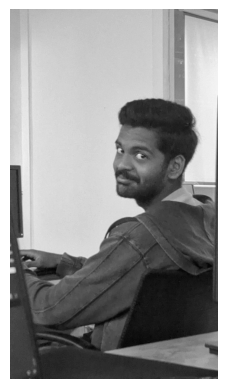

Spectrogram Shape: (1025, 227)


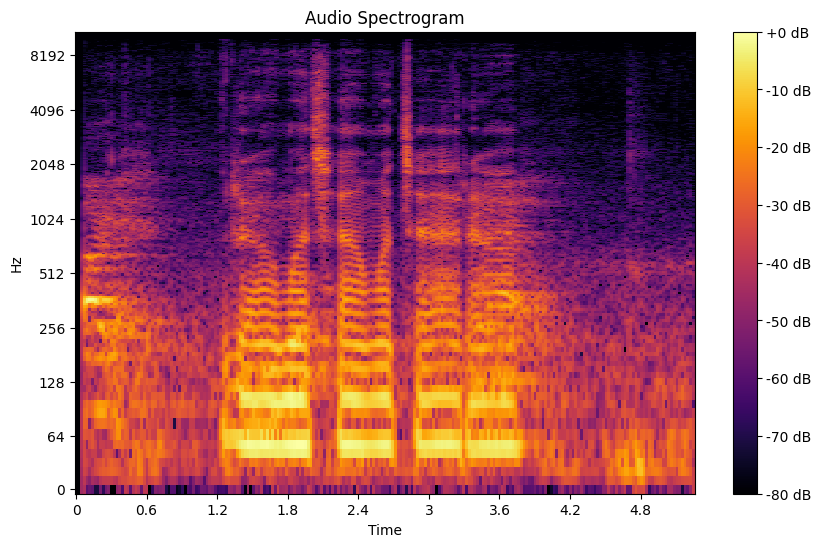

In [13]:

import numpy as np
import tensorflow as tf
from PIL import Image

x_rgb = np.array(Image.open("/content/WhatsApp Image 2025-01-06 at 10.35.38 AM.jpeg")).astype('float32')
weights = tf.constant([0.3, 0.11, 0.34])
grayscale_image = tf.reduce_sum(x_rgb * weights, axis=-1)

print(grayscale_image)

import matplotlib.pyplot as plt
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')
plt.show()

import numpy as np
import tensorflow as tf
import librosa
import librosa.display
import matplotlib.pyplot as plt
audio_path = "/content/WhatsApp Audio 2025-01-06 at 10.33.56 AM (1).wav"
y, sr = librosa.load(audio_path, sr=None)

D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

spectrogram_tensor = tf.convert_to_tensor(S_db, dtype=tf.float32)
print(f"Spectrogram Shape: {spectrogram_tensor.shape}")
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_db, x_axis='time', y_axis='log', cmap='inferno')
plt.colorbar(format='%+2.0f dB')
plt.title('Audio Spectrogram')
plt.show()


In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

iris = load_iris()
X = iris.data
y = iris.data[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_predictions = ridge.predict(X_test)
ridge_score = r2_score(y_test, ridge_predictions)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_predictions = lasso.predict(X_test)
lasso_score = r2_score(y_test, lasso_predictions)
print(f"Ridge R^2 Score: {ridge_score:.2f}")
print(f"Lasso R^2 Score: {lasso_score:.2f}")

Ridge R^2 Score: 1.00
Lasso R^2 Score: 1.00


KMeans Silhouette Score: 0.1764738746996612


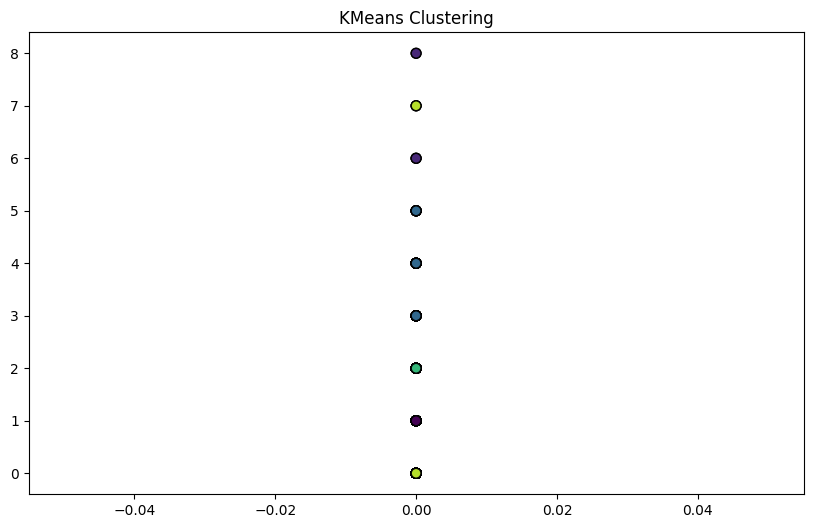

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

digits = load_digits()
X = digits.data
y = digits.target

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

silhouette_kmeans = silhouette_score(X, kmeans_labels)
print(f"KMeans Silhouette Score: {silhouette_kmeans}")

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k', s=50)
plt.title('KMeans Clustering')
plt.show()


In [18]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from collections import Counter

X, y = make_classification(
    n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3,
    n_redundant=1, flip_y=0, n_features=5, n_clusters_per_class=1,
    n_samples=1000, random_state=42
)
print(f"Original class distribution: {Counter(y)}")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print(f"SMOTE class distribution: {Counter(y_smote)}")
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X_train, y_train)
print(f"Undersampled class distribution: {Counter(y_under)}")
smoteenn = SMOTEENN(random_state=42)
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X_train, y_train)
print(f"SMOTEENN class distribution: {Counter(y_smoteenn)}")

clf = RandomForestClassifier(random_state=42)
clf.fit(X_smote, y_smote)
y_pred_smote = clf.predict(X_test)
print("\nClassification Report (SMOTE):")
print(classification_report(y_test, y_pred_smote, zero_division=0))
clf.fit(X_under, y_under)
y_pred_under = clf.predict(X_test)
print("\nClassification Report (Undersampling):")
print(classification_report(y_test, y_pred_under, zero_division=0))

clf.fit(X_smoteenn, y_smoteenn)
y_pred_smoteenn = clf.predict(X_test)
print("\nClassification Report (SMOTEENN):")
print(classification_report(y_test, y_pred_smoteenn, zero_division=0))


Original class distribution: Counter({1: 900, 0: 100})
SMOTE class distribution: Counter({1: 630, 0: 630})
Undersampled class distribution: Counter({0: 70, 1: 70})
SMOTEENN class distribution: Counter({0: 630, 1: 630})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn


Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.99      1.00       270

    accuracy                           0.99       300
   macro avg       0.97      1.00      0.98       300
weighted avg       0.99      0.99      0.99       300


Classification Report (Undersampling):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.99      1.00       270

    accuracy                           0.99       300
   macro avg       0.97      1.00      0.98       300
weighted avg       0.99      0.99      0.99       300


Classification Report (SMOTEENN):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.99      1.00       270

    accuracy                           0.99       300
   macro avg       0.

In [20]:
import pandas as pd
data = pd.read_csv("/content/P7_DLSR.csv")
data.head()
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

X = data.loc[:,"Time":"L4"]
y = data.loc[:, "ClASS"]

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=42)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

new_instance = pd.DataFrame([[122160,226.20,5.03,37.647861,0.600265]], columns=X.columns)
new_instance_std = scaler.transform(new_instance)
result = model.predict(new_instance_std)
print("Prediction For New Instance: ",result)

print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test,y_pred, average='weighted'))

Prediction For New Instance:  ['Weak']
Accuracy: 0.9814814814814815
Precision: 0.9818445896877269


In [21]:
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    cv_scores.append(scores.mean())

best_k = k_values[np.argmax(cv_scores)]
print(f"Best k: {best_k}")

Best k: 12


In [22]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=5)
knn.fit(X_std,y)

distances, indices = knn.kneighbors(new_instance_std)


print("Distances to Neighbors:", distances.flatten())
print("Indices of Neighbors:", indices.flatten())

Distances to Neighbors: [0.         2.6149745  2.65408383 2.65750274 2.69613744]
Indices of Neighbors: [ 0  1 11 10 12]


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
svm = SVC(probability=True)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        32
           1       0.80      0.86      0.83        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60

Accuracy: 0.8333333333333334


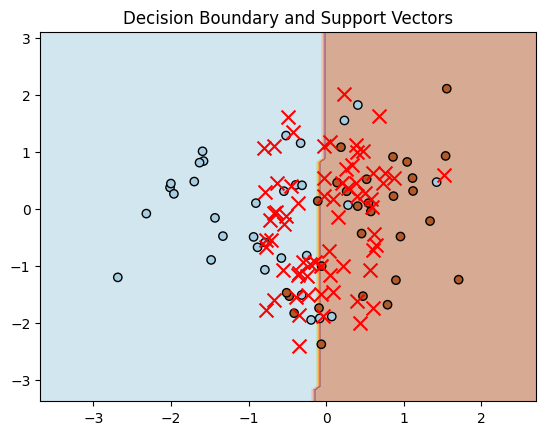

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def plot_simple_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], color='red', marker='x', s=100)
    plt.title("Decision Boundary and Support Vectors")
    plt.show()

plot_simple_boundary(X_test, y_test, model)


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd
data = pd.read_csv("/content/Titanic.csv")
data.head()

X = data.drop(columns=['Name', 'Ticket', 'Cabin','Survived'])
y = data['Survived']

X['Age'] = X['Age'].fillna(X['Age'].median())
X['Fare'] = X['Fare'].fillna(X['Fare'].median())

label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])
X['Embarked'] = label_encoder.fit_transform(X['Embarked'])

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

new_instance = pd.DataFrame({'PassengerId':[7],'Pclass': [3], 'Sex': [1], 'Age': [25], 'SibSp': [1], 'Parch': [0], 'Fare': [50], 'Embarked': [2]})
new_instance_std = scaler.transform(new_instance)
prediction = model.predict(new_instance_std)
print("Prediction:", prediction)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))